In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [6]:
np.random.seed(seed=26)
N = 1000
k = 3

In [7]:
rv = sts.chi2(k) #Хи2 распределение с k степенями свободы
sample = rv.rvs(N) #генерация выборки размером N
x = np.linspace(0,max(sample),N) 
pdf = rv.pdf(x) #теоретическая плотность распределения для вектора x

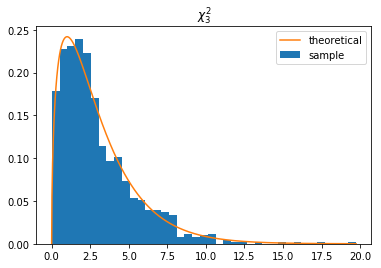

In [8]:
# График теоретического и гистограмма выборочного распределения
hist_bin = int(max(sample))*2+1 #чило разбиений для hist
plt.hist(sample, hist_bin, normed=True, label="sample")
plt.plot(x, pdf, label="theoretical")
plt.legend()
plt.title("$\chi^2_%s$" % k)
None

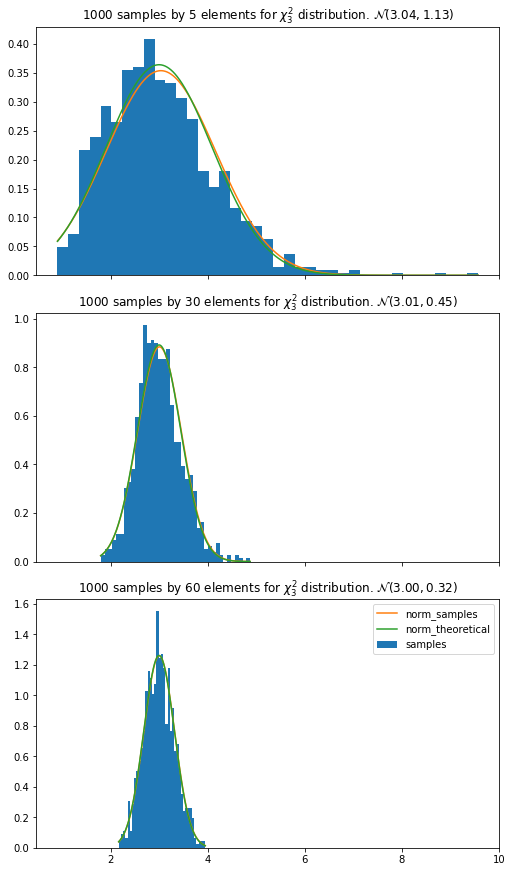

In [9]:
# Графики распределения выборочных средних для разных n из var
var = [5,30,60]
var_l = len(var)
f, axs  = plt.subplots(var_l,1,figsize=(7,4*var_l), constrained_layout=True,sharex=True, sharey=False)
res_dict={}
for i,n in enumerate(var):
    if var_l == 1: ax = axs #костыль 
    else: ax = axs[i] 
    samples_1000 = [rv.rvs(n) for _ in range(N)] # N выборок по n
    samples_mean = [np.mean(s) for s in samples_1000] # среднии выборок
    mu = np.mean(samples_mean) # средние выборочных средних
    sigma = np.std(samples_mean, ddof=1) # исправленное(ddof=1) стандартное отклонение
    ax.hist(samples_mean,hist_bin, normed=True, label="samples")
    x = np.linspace(min(samples_mean),max(samples_mean),N)
    ax.plot(x, sts.norm.pdf(x, mu, sigma), label="norm_samples")
    ax.plot(x, sts.norm.pdf(x, rv.stats()[0], np.sqrt(rv.stats()[1]/n)), label="norm_theoretical")
    plt.legend()
    ax.set_title("%s samples by %s elements for $\chi^2_%s$ distribution. $\mathcal {N}(%.2f,%.2f)$" % (N,n,k,mu,sigma))
    res_dict[n]={'mu':mu,'sigma':sigma}

In [10]:
print "          Для распределения Хи2 при k=%s: " %k + ("M[x]=%.3f, D[x](гене)=%.3f" % rv.stats())
for key,v in sorted(res_dict.items()):
    print ("Выборочные(n=%4d) оценки распределения: " %key +
           "M[x]=%.3f, D[x](вост)=%.3f" % (v['mu'],np.power(v['sigma'],2)*key))

          Для распределения Хи2 при k=3: M[x]=3.000, D[x](гене)=6.000
Выборочные(n=   5) оценки распределения: M[x]=3.037, D[x](вост)=6.354
Выборочные(n=  30) оценки распределения: M[x]=3.007, D[x](вост)=6.107
Выборочные(n=  60) оценки распределения: M[x]=3.003, D[x](вост)=6.019


#### С увеличением числа элементов выборки их статистические оценки начинают сходиться к теритическим. Что соответствует ЦПТ.